In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker  
%matplotlib inline

 Выбранные данные (houses_to_rent_v2.csv) отражают стоимость аренды домов в Бразилии.   Этот набор данных содержит 10692 дома для аренды с 13 различными характеристиками. 
 city - город, в котором находится недвижимость;
 area - площадь; rooms - количество комнат;  bathroom - количество ванных комнат;
 parking spaces - количество мест для парковки; floor - количество этажей; animal - разрешены ли животные; furniture - наличие мебели; hoa - стоимость налога домовладельцев; rent amount - стоимость арендной платы; property tax - стоимость имущественного налога; Fire Insurance - стоимость страховка от пожара; total - конечная стоимость аренды жилья
 

In [3]:
data = pd.read_csv('./houses_to_rent_v2.csv', index_col =False)
data.head()

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


Стоимость аренды дома относительно количества комнат

Text(0.5, 1.0, 'Price by city')

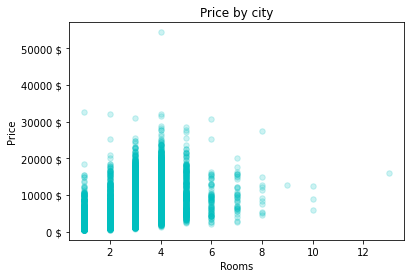

In [4]:
new_data=data[data.total < 60000]
city_data = new_data.rooms.values
total_data = new_data.total.values
plt.scatter(city_data, total_data, alpha=0.2, c='c', s=30)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d $'))
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.title('Price by city')

Можно отметить, что больше всего домов площадью менее 250. С увелечением площади растет и цена. 

Text(0.5, 1.0, 'Price by area')

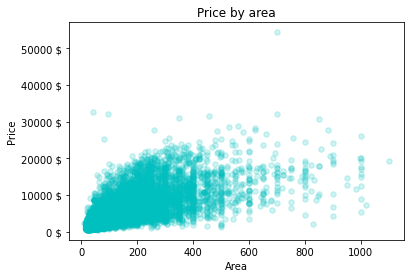

In [5]:
new_data=data[(data.area < 1250) & (data.total < 60000)]
city_data = new_data.area.values
total_data = new_data.total.values
plt.scatter(city_data, total_data, alpha=0.2, c='c', s=30)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d $'))
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price by area')

Больше всего домов сдается в Sao Paulo.

Text(0.5, 1.0, 'Count house in diffetent city')

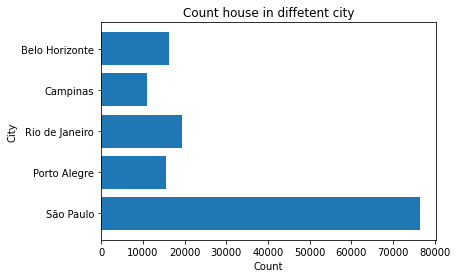

In [6]:
city_data_count = []
city_data = pd.unique(data.city)
for city in city_data:
    city_data_count.append(data[data.city == city].size)
plt.barh(city_data, city_data_count)
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Count house in diffetent city')

Средняя цена за дом с одной комнатой по городам.

city
Belo Horizonte    16713.766667
Name: total, dtype: float64

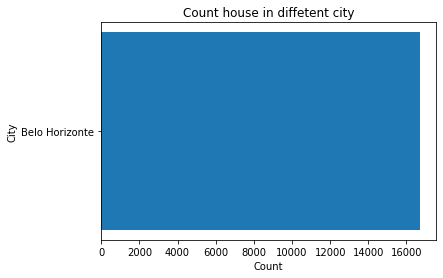

In [79]:

new_data=data[(data.rooms ==1) & (data.area < 250)]
total_by_city= new_data.groupby('city')['total'].mean()
plt.barh(total_by_city.keys(), total_by_city)
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Count house in diffetent city')
total_by_city